In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
data=pd.read_csv(r"C:\Users\Rohan\Downloads\train.csv")
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**The above code gives use the information about all the datatype ,columns ,number of non null values which we can be used to determine 
   that the data have some missing values**

In [286]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**.describe give us statistical inferences, that is the lowest value and highest value in a particular column, mean, median, and other details which can be used to check wether all the values make sense or not**

In [289]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**we have a clear understanding about how many columns have null value and total number of rows in a particular column that do not have values
using these details we can perfom EDA**

In [292]:
data['Age'].mean()

29.69911764705882

In [294]:
#missing vaules in the age column can be filled with the average of age column
data['Age']=data['Age'].fillna(data['Age'].mean())

# we can fill up the mising values in CABIN column with 'Unknown'
data['Cabin']=data['Cabin'].fillna('Unknown')


# there is only 2 values missing in the embarked column therefore we can just drop the rows
data=data.dropna()


In [296]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### All the necessary Process is done and no we can go for Visualizing the data

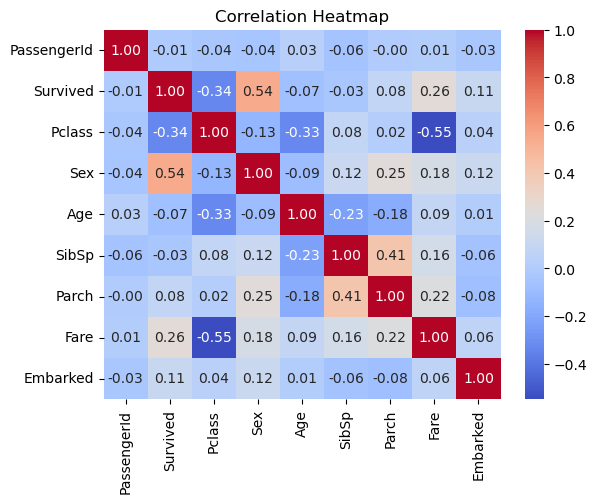

In [344]:
df_encoded = data.copy()
# for making all the string value to numeric values
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_encoded= df_encoded[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

corr_matrix = df_encoded.corr()



sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

*The Correlation Heatmap visually represents relationships between numerical features in the dataset. Darker shades indicate stronger correlations.
For example, Sex and Survived show a high correlation, suggesting gender influenced survival rates*

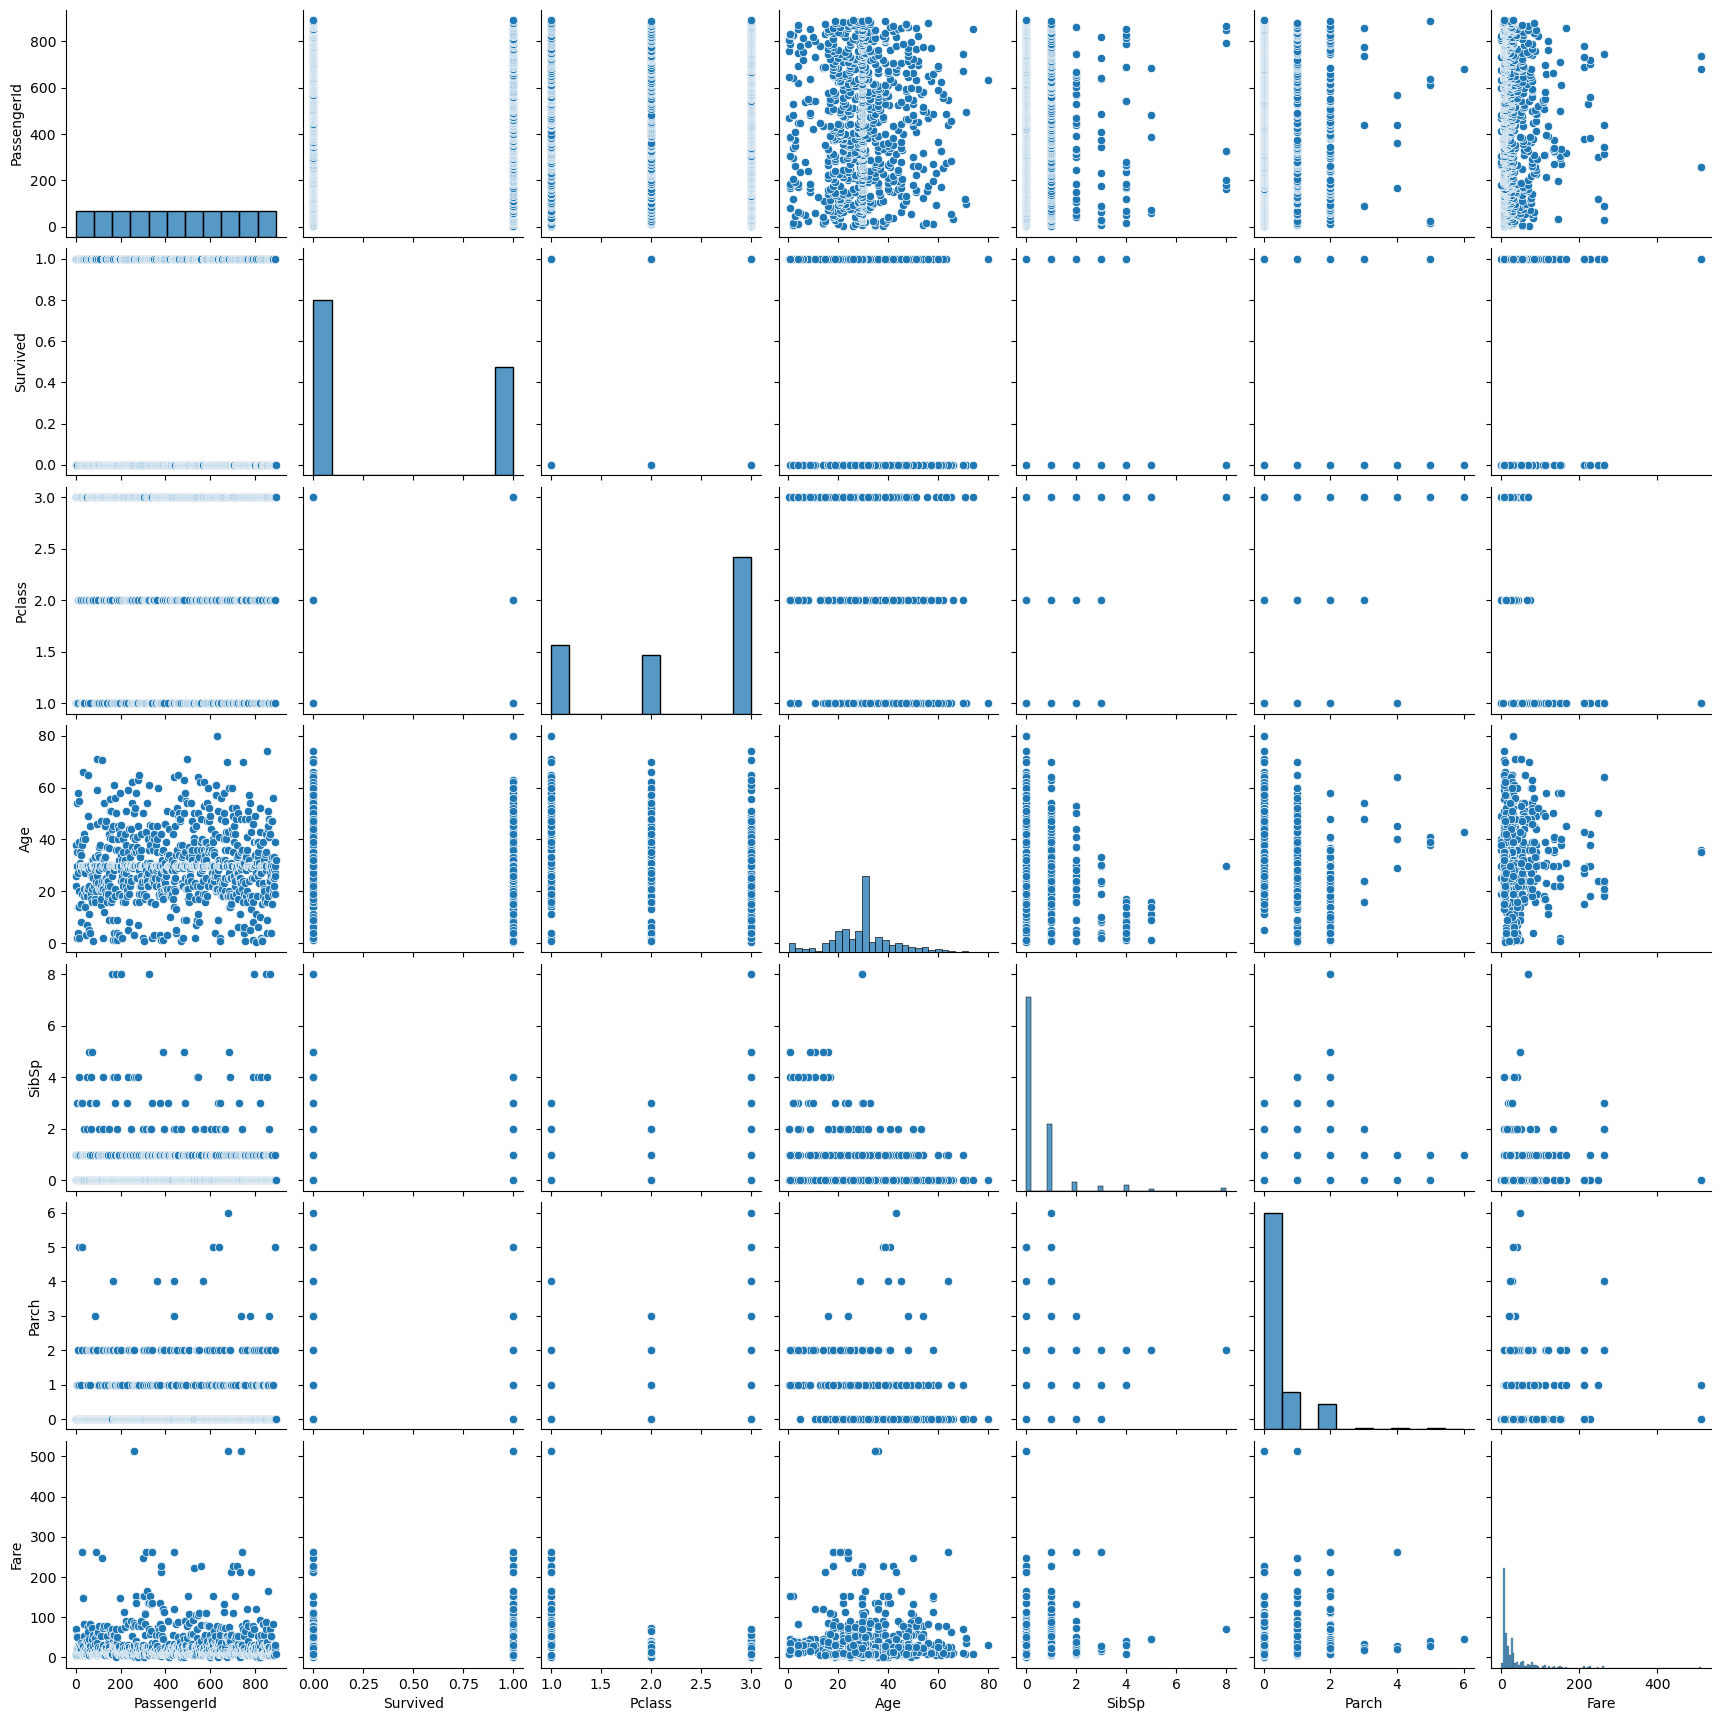

In [399]:
sns.pairplot(data)

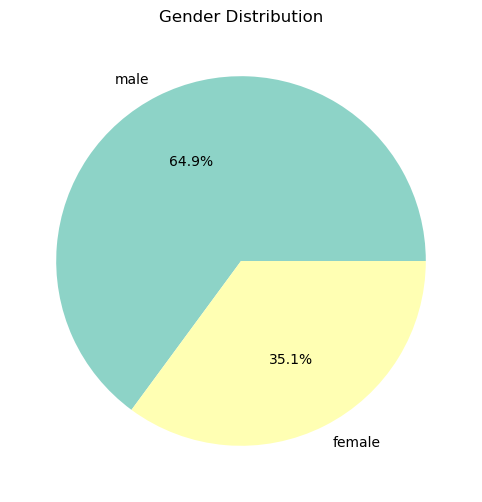

In [404]:
genders=data['Sex'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%',  colors=sns.color_palette('Set3'))
plt.title('Gender Distribution')
plt.show()

*The Gender Distribution pie chart visually represents the proportion of males and females in the dataset. It shows that males make up a larger percentage, while females form a smaller portion.*

Text(0.5, 1.0, 'Age Distribution')

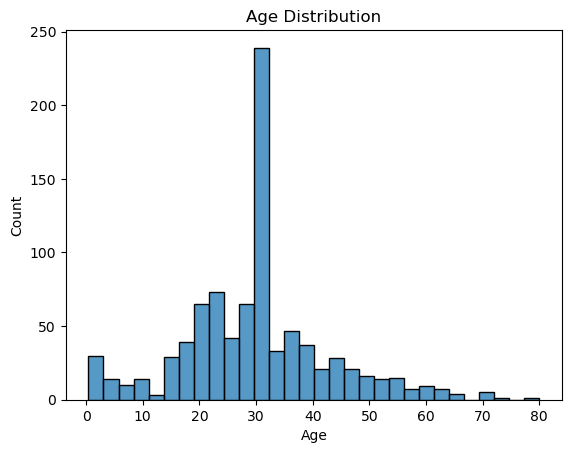

In [336]:

sns.histplot(data['Age'])
plt.title('Age Distribution')

*the Age Distribution histogram shoes a picture of the Titanic's passengers where most were young adults in their 20s and 30s,*

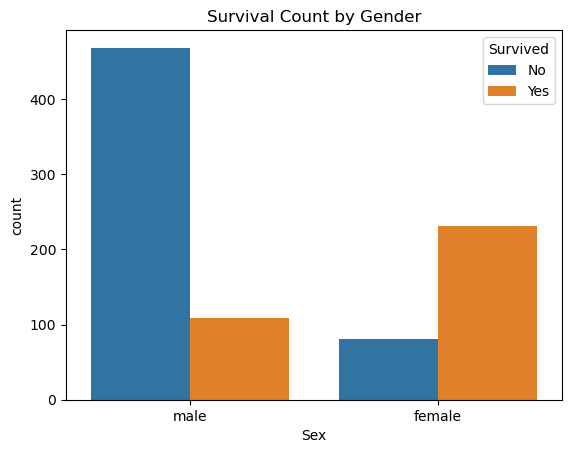

In [346]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Count by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])


*The Survival Count by Gender chart shows a clear pattern about more men lost their lives, while more women survived. This reflects the historical "women and children first" policy during evacuations*

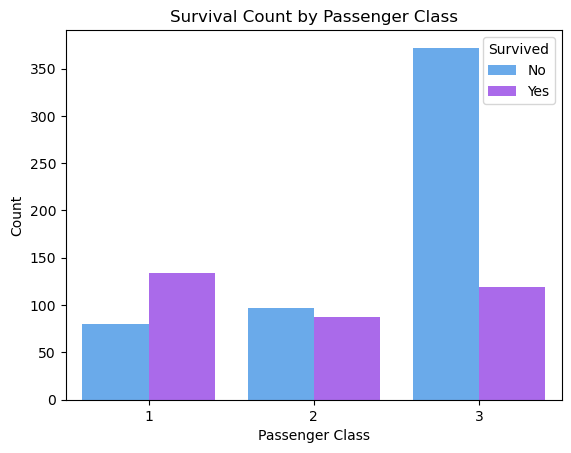

In [348]:
sns.countplot(x='Pclass', hue='Survived', data=data, palette='cool')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

*The Survival Count by Passenger Class chart tells us that first-class passengers had the highest survival rate, while third-class passengers faced the greatest losses. This reflects the differences in access to lifeboats and evacuation priority*